# Pymaceuticals Inc. Analysis

* Over the course of 45 days, few drugs were not at all effective and tumor size was increased. Most effective drug was Ramicane(on an average tumor size reduced to 34.95(mm3)) and least effective drug was Ketapril(on an average tumor size increased to 70.66(mm3)). Out of Capomulin, Infubinol, Ketapril, and Placebo drugs, Capomulin was most effective (on an average tumor size reduced to 36.23(mm3)) and least effective drug was Ketapril.

* Out of Capomulin, Infubinol, Ketapril, and Placebo drugs, Metastatic Response was also highest for Capomulin(1.47) and lowest for Ketapril(3.36).

* Although tumor size was greatly reduced by Ramicane(with mice survival rate 80%) but Mice survival rate was highest for Capomulin(84%).
----

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

#Combine the data into a single dataset
merged_mouse_clinical = pd.merge(clinical_trial, mouse_drug, how='outer', on='Mouse ID')

# Display the data table for preview
merged_mouse_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_tumor = merged_mouse_clinical.groupby(['Drug','Timepoint'])

# Convert to DataFrame
grouped_tumor_df = grouped_tumor['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
grouped_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_tumor_error = merged_mouse_clinical.groupby(['Drug','Timepoint'])

# Convert to DataFrame
grouped_tumor_error_df = grouped_tumor_error['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
grouped_tumor_error_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
grouped_tumor_pivot_df = pd.DataFrame(grouped_tumor_df.pivot_table('Tumor Volume (mm3)',['Timepoint'],'Drug'))

# Preview that Reformatting worked
grouped_tumor_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [20]:
pivot_tumor_error_df = pd.DataFrame(grouped_tumor_error_df.pivot_table('Tumor Volume (mm3)',['Timepoint'],'Drug'))
merge_tumor_error_df = pd.merge(grouped_tumor_pivot_df, pivot_tumor_error_df, how='inner', on='Timepoint')
merge_tumor_error_df = merge_tumor_error_df.rename(columns={'Capomulin_x':'Capomulin',
                                                            'Ceftamin_x':'Ceftamin',
                                                            'Infubinol_x':'Infubinol',
                                                            'Ketapril_x':'Ketapril',
                                                            'Naftisol_x':'Naftisol',
                                                            'Placebo_x':'Placebo',
                                                            'Propriva_x':'Propriva',
                                                            'Ramicane_x':'Ramicane',
                                                            'Stelasyn_x':'Stelasyn',
                                                            'Zoniferol_x':'Zoniferol',
                                                            'Capomulin_y':'Capomulin_Err',
                                                            'Ceftamin_y':'Ceftamin_Err',
                                                            'Infubinol_y':'Infubinol_Err',
                                                            'Ketapril_y':'Ketapril_Err',
                                                            'Naftisol_y':'Naftisol_Err',
                                                            'Placebo_y':'Placebo_Err',
                                                            'Propriva_y':'Propriva_Err',
                                                            'Ramicane_y':'Ramicane_Err',
                                                            'Stelasyn_y':'Stelasyn_Err',
                                                            'Zoniferol_y':'Zoniferol_Err'})
#merge_tumor_error_df

In [21]:
x_axis = merge_tumor_error_df.index

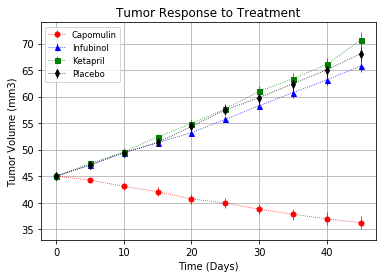

In [8]:
x_axis = merge_tumor_error_df.index
plt.errorbar(x_axis,merge_tumor_error_df['Capomulin'], yerr = merge_tumor_error_df['Capomulin_Err'], marker ='o', color='red', label= 'Capomulin', linewidth = .75, linestyle = ':', ms=5)
plt.errorbar(x_axis,merge_tumor_error_df['Infubinol'], yerr = merge_tumor_error_df['Infubinol_Err'], marker ='^', color='blue', label= 'Infubinol', linewidth = .75, linestyle = ':', ms=5)
plt.errorbar(x_axis,merge_tumor_error_df['Ketapril'], yerr = merge_tumor_error_df['Ketapril_Err'], marker ='s', color='green', label= 'Ketapril', linewidth = .75, linestyle = ':', ms=5)
plt.errorbar(x_axis,merge_tumor_error_df['Placebo'], yerr = merge_tumor_error_df['Placebo_Err'], marker ='d', color='black', label= 'Placebo', linewidth = .75, linestyle = ':', ms=5)

lgnd = plt.legend(loc="upper left", fontsize='small')
lgnd.legendHandles[0]._sizes= [10]
lgnd.legendHandles[1]._sizes= [10]

plt.grid()

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.ylim(33,74)
# Save the Figure
plt.savefig('../Images/Tumor_Error.png')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_mean_metastatic = merged_mouse_clinical.groupby(['Drug','Timepoint'])
# Convert to DataFrame
grouped_mean_metastatic_df = pd.DataFrame(grouped_mean_metastatic['Metastatic Sites'].mean())
# Preview DataFrame
grouped_mean_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_metastatic_error = merged_mouse_clinical.groupby(['Drug','Timepoint'])

# Convert to DataFrame
grouped_metastatic_error_df = pd.DataFrame(grouped_metastatic_error['Metastatic Sites'].sem())

# Preview DataFrame
grouped_metastatic_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mean_metastatic_pivot_df = pd.DataFrame(grouped_mean_metastatic_df.reset_index().pivot_table('Metastatic Sites',['Timepoint'],'Drug'))

# Preview that Reformatting worked
grouped_mean_metastatic_pivot_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
pivot_metastatic_error_df = pd.DataFrame(grouped_metastatic_error_df.reset_index().pivot_table('Metastatic Sites',['Timepoint'],'Drug'))
merge_metastatic_error_df = pd.merge(grouped_mean_metastatic_pivot_df, pivot_metastatic_error_df, how='inner', on='Timepoint')
merge_metastatic_error_df = merge_metastatic_error_df.rename(columns={'Capomulin_x':'Capomulin',
                                                            'Ceftamin_x':'Ceftamin',
                                                            'Infubinol_x':'Infubinol',
                                                            'Ketapril_x':'Ketapril',
                                                            'Naftisol_x':'Naftisol',
                                                            'Placebo_x':'Placebo',
                                                            'Propriva_x':'Propriva',
                                                            'Ramicane_x':'Ramicane',
                                                            'Stelasyn_x':'Stelasyn',
                                                            'Zoniferol_x':'Zoniferol',
                                                            'Capomulin_y':'Capomulin_Err',
                                                            'Ceftamin_y':'Ceftamin_Err',
                                                            'Infubinol_y':'Infubinol_Err',
                                                            'Ketapril_y':'Ketapril_Err',
                                                            'Naftisol_y':'Naftisol_Err',
                                                            'Placebo_y':'Placebo_Err',
                                                            'Propriva_y':'Propriva_Err',
                                                            'Ramicane_y':'Ramicane_Err',
                                                            'Stelasyn_y':'Stelasyn_Err',
                                                            'Zoniferol_y':'Zoniferol_Err'})
#merge_metastatic_error_df

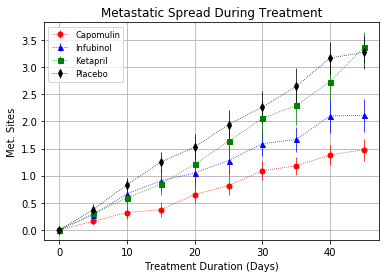

In [13]:
plt.errorbar(x_axis,merge_metastatic_error_df['Capomulin'], yerr = merge_metastatic_error_df['Capomulin_Err'], marker ='o', color='red', label= 'Capomulin', linewidth = .75, linestyle = ':', ms=5)
plt.errorbar(x_axis,merge_metastatic_error_df['Infubinol'], yerr = merge_metastatic_error_df['Infubinol_Err'], marker ='^', color='blue', label= 'Infubinol', linewidth = .75, linestyle = ':', ms=5)
plt.errorbar(x_axis,merge_metastatic_error_df['Ketapril'], yerr = merge_metastatic_error_df['Ketapril_Err'], marker ='s', color='green', label= 'Ketapril', linewidth = .75, linestyle = ':', ms=5)
plt.errorbar(x_axis,merge_metastatic_error_df['Placebo'], yerr = merge_metastatic_error_df['Placebo_Err'], marker ='d', color='black', label= 'Placebo', linewidth = .75, linestyle = ':', ms=5)

lgnd = plt.legend(loc="upper left", fontsize='small')
lgnd.legendHandles[0]._sizes= [10]
lgnd.legendHandles[1]._sizes= [10]

plt.grid()

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig('../Images/Metastatic_Error.png')
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mice_count = merged_mouse_clinical.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
grouped_mice_count_df = grouped_mice_count['Mouse ID'].count().reset_index()
grouped_mice_count_df = grouped_mice_count_df.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
grouped_mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mice_count_pivot_df = pd.DataFrame(grouped_mice_count_df.pivot_table( 'Mouse Count', ['Timepoint'], 'Drug'))
# Preview the Data Frame
grouped_mice_count_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
mice_survival = pd.DataFrame(grouped_mice_count_pivot_df[['Capomulin', 'Infubinol', 'Ketapril','Placebo']])
mice_survival_zero = mice_survival.iloc[0,:]
mice_survival_percent = pd.DataFrame(mice_survival)
mice_survival_percent= mice_survival_percent*100/mice_survival_zero
#mice_survival_percent

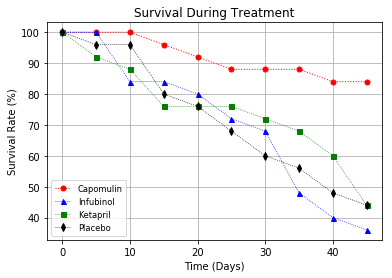

In [17]:
# Generate the Plot (Accounting for percentages)
plt.plot(x_axis,mice_survival_percent['Capomulin'], marker ='o', color='red', label= 'Capomulin', linewidth = 1, linestyle = ':', ms=5)
plt.plot(x_axis,mice_survival_percent['Infubinol'], marker ='^', color='blue', label= 'Infubinol', linewidth = .75, linestyle = ':', ms=5)
plt.plot(x_axis,mice_survival_percent['Ketapril'], marker ='s', color='green', label= 'Ketapril', linewidth = .75, linestyle = ':', ms=5)
plt.plot(x_axis,mice_survival_percent['Placebo'], marker ='d', color='black', label= 'Placebo', linewidth = .75, linestyle = ':', ms=5)

lgnd = plt.legend(loc="lower left", fontsize='small')
lgnd.legendHandles[0]._sizes= [10]
lgnd.legendHandles[1]._sizes= [10]

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig('../Images/Survival_Mouse.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
tumor_change_first = grouped_tumor_pivot_df.iloc[0,:]
tumor_change_last = grouped_tumor_pivot_df.iloc[len(grouped_tumor_pivot_df)-1,:]
percent_change = (tumor_change_last - tumor_change_first)*100/tumor_change_first
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

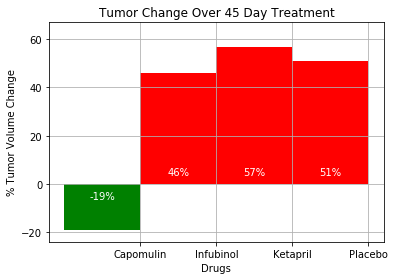

In [19]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
percent_change_df = pd.DataFrame(percent_change[['Capomulin','Infubinol','Ketapril','Placebo']]).reset_index()
percent_change_df = percent_change_df.rename(columns={0:'% Change'})
percent_change_df['% Change'] = round(percent_change_df['% Change'],0)
percent_change_pass = percent_change_df.loc[percent_change_df['% Change'] >= 0]
percent_change_fail = percent_change_df.loc[percent_change_df['% Change'] <= 0]

x_axis_pass = percent_change_pass.index
x_axis_fail = percent_change_fail.index
tick_locations_pass = [value for value in x_axis_pass]
tick_locations_fail = [value for value in x_axis_fail]

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(5.6,4))
plt.grid()
points = np.concatenate([tick_locations_pass,tick_locations_fail])
tick_locations = [value+1 for value in points]
rects_pass = plt.bar(x_axis_pass, percent_change_pass["% Change"], color='r', alpha=1, align="edge", width=1)
rects_fail = plt.bar(x_axis_fail, percent_change_fail["% Change"], color='g', alpha=1, align="edge", width=1)
plt.xticks(tick_locations, np.concatenate([percent_change_pass["Drug"],percent_change_fail["Drug"]]))

# Use functions to label the percentages of changes
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        y_cor = 0
        if height >0:
            y_cor += 7
        else:
            y_cor -= 3
        #print(y_cor)
        plt.text(rect.get_x() + rect.get_width()/2.0, y_cor,
                str(int(height))+'%',
                ha='center', va='top',color='w')



# Call functions to implement the function calls
autolabel(rects_pass)
autolabel(rects_fail)

# Set a Title and labels
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.tight_layout()

# Set x and y limits
x_axis = np.concatenate([x_axis_pass,x_axis_fail])
plt.xlim(-.2, len(x_axis)+.2)
plt.ylim(min(percent_change_fail["% Change"])-5, max(percent_change_pass["% Change"])+10)

# Save the Figure
plt.savefig('../Images/Bar_Summary.png')

# Show the Figure
plt.show()